Create a word cloud out of Japanese news text from Yahoo
Author: Junjie Hu
Submitted by Andreas Rony Wijaya
Created time: 28.10.2020

In [1]:
pip install sudachipy

In [2]:
import os
import pandas as pd
from sudachipy import tokenizer, dictionary
# pip3 install SudachiPy if package not found
# CorePackage:
!pip install https://object-storage.tyo2.conoha.io/v1/nc_2520839e1f9641b08211a5c85243124a/sudachi/SudachiDict_core-20191030.tar.gz
# More information: https://github.com/WorksApplications/SudachiPy
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

     |████████████████████████████████| 70.7MB 57kB/s 
  Created wheel for SudachiDict-core: filename=SudachiDict_core-20191030-cp36-none-any.whl size=70878879 sha256=8e4b6af5787cfb734e50784eb621b958c77b7f5fd33a0cb73712fb0536b9a66f
  Stored in directory: /root/.cache/pip/wheels/89/ef/df/2d5ee9dfb78a796e7f03965b4a9b31e1b7007b6a47c12d29ad
Successfully built SudachiDict-core


In [4]:
def TokenCleanText(tker, mode, text):
    text = text.strip()
    tokenized_txt = [m.dictionary_form() for m in tker.tokenize(text, mode)]
    cleaned_txt = [word for word in tokenized_txt if word not in sw]
    return cleaned_txt


# Read and Pre-process Data
cwd = os.getcwd()
full_text = pd.read_csv(cwd + '/yahoo_jp.csv', sep=';')['text'].values

# Define Stopping Words
with open(cwd + '/stopwords-ja.txt', 'r+') as sw_file:
    sw = sw_file.read().splitlines()  # Define stop words and punctuation, not perfect!
sw.extend(['\n', '\n\n'])

# Tokenize Text
tk_obj = dictionary.Dictionary().create()
mode = tokenizer.Tokenizer.SplitMode.C
full_text_clean = [TokenCleanText(tk_obj, mode, text) for text in full_text]
clean_words = [word for txt in full_text_clean for word in txt]

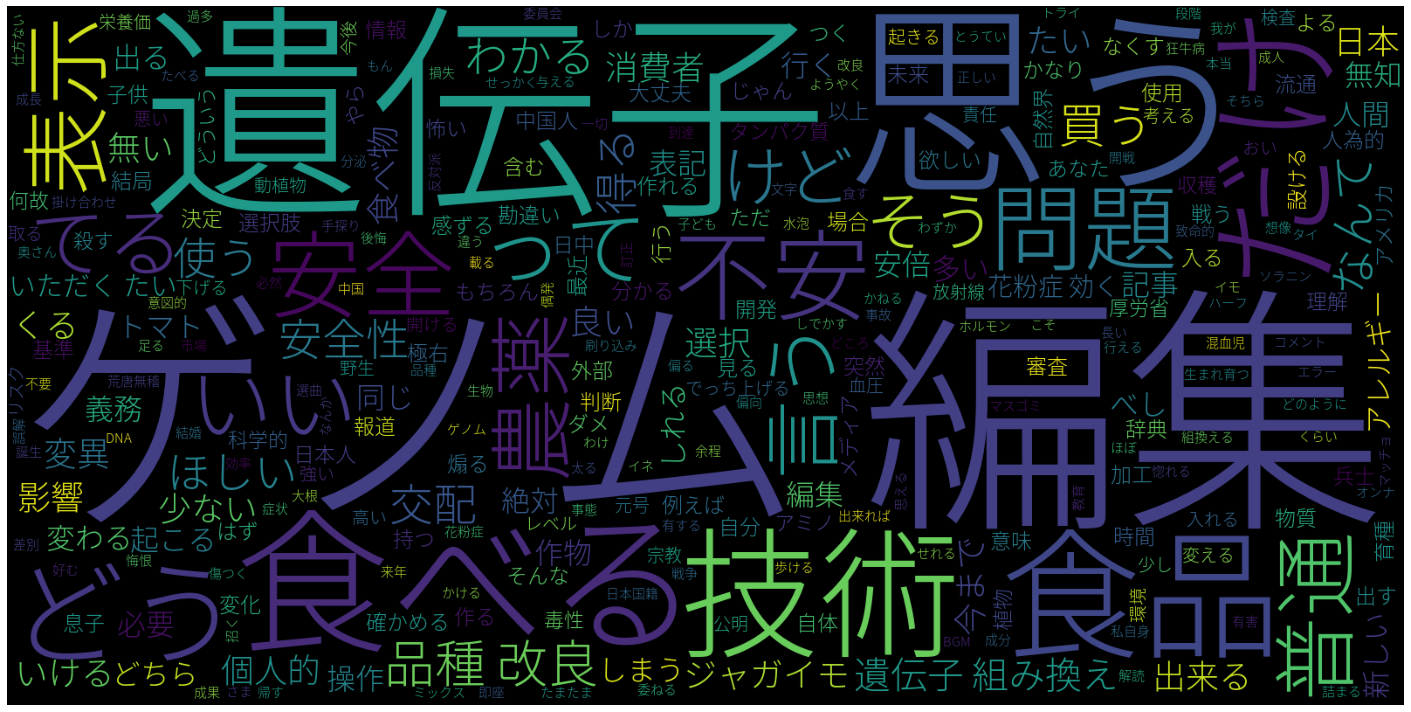

<Figure size 432x288 with 0 Axes>

In [6]:
# Create WordCloud
stopwords = set(STOPWORDS)
font_path = cwd + '/NotoSansCJKjp.otf'
plt.figure(figsize=(20, 10))
wordcloud = WordCloud(max_words=300, font_path=font_path,
                      stopwords=stopwords, width=1600,
                      height=800).generate(" ".join(clean_words))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()
plt.savefig(cwd + '/wordcloud_jp.png', dpi=300)